<a name = "inicio"></a>
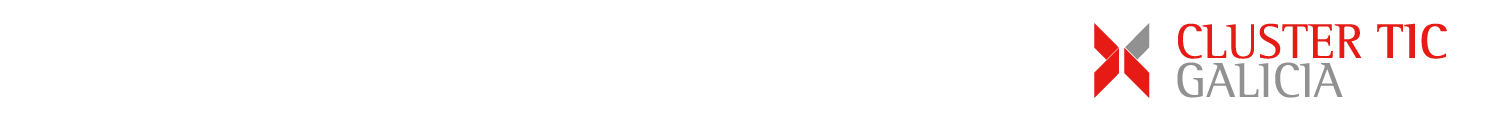

<div style="font-size: 50px;text-align: center;height:70px;line-height: 60px;padding:10px;margin:10px 0 0 0;">Introducción a Pandas</div>

# Índice
1. [Presentación](#Presentación)
1. [Introducción a las estructuras de datos de pandas](#Introducción-a-las-estructuras-de-datos-de-pandas)
1. [Creación de series y dataframes](#Creación-de-series-y-dataframes)
1. [Inspección de series y dataframes](#Inspección-de-series-y-dataframes)

# Presentación

La librería pandas (nombre derivado de **panel data**, término usado para referirse a conjuntos de datos estructurados multidimensionales) proporciona estructuras de datos y funciones de alto nivel que nos permiten trabajar con datos estructurados de manera muy cómoda. Estas estructuras y funciones son, normalmente, de las más usadas en análisis de datos, destacando por su capacidad para manejar de forma eficiente datos heterogéneos y facilitar operaciones complejas de análisis y manipulación de datos, tareas que pueden resultar más laboriosas con NumPy.

De igual modo que la librería *NumPy* nos provee, básicamente, de una clase (el *array multidimensional*), la librería *Pandas* nos provee de dos clases: las *Series* y los *DataFrames* (un objeto de estas clases será referido en ocasiones como "*serie*" y "*dataframe*" a lo largo de esta documentación). Éstas son las clases centrales que nos permiten manejar y analizar datos estructurados de forma eficiente y eficaz en Python, aprovechando las operaciones vectorizadas de NumPy, a lo que se añaden funcionalidades clave para el análisis de datos, como la manipulación de índices para reordenaciones, segmentaciones y alineaciones más intuitivas.

#### Series
La clase **Series** en Pandas representa un vector de datos etiquetados de cualquier tipo (enteros, cadenas de textos, números reales...). Cada elemento de una Serie está asociado a un índice: una etiqueta que nos permite acceder al valor de manera rápida y sencilla. Podemos pensarse en una *Serie* como una columna de una tabla.

#### DataFrames
Por otro lado, la clase **DataFrame** representa una estructura de datos tabular bidimensional con etiquetas en filas y columnas, similar a una hoja de cálculo o una tabla de base de datos SQL. Cada columna en un *DataFrame* puede ser de un tipo de dato diferente, lo que nos permite trabajar con datos heterogéneos de forma organizada.

Por otro lado, la clase **DataFrame** representa una estructura de datos tabular bidimensional con etiquetas en filas y columnas, similar a una hoja de cálculo o una tabla de base de datos SQL. Cada columna en un DataFrame puede ser de un tipo de dato diferente, lo que nos permite trabajar con datos heterogéneos de forma organizada. Este enfoque facilita la integración con otras herramientas de análisis y visualización de datos, estableciendo a Pandas como la herramienta de elección para el análisis de datos en Python más allá de las capacidades de *NumPy*.

Ambas estructuras se construyen sobre arrays *multidimensionales NumPy*, lo que hace que se herede muchas de sus características y muchas de sus funciones, que son aplicables directamente a las estructuras Pandas. Las funcionalidades adicionales para el manejo de datos nulos, las agrupaciones, y la manipulación avanzada de series temporales, hacen de Pandas una extensión natural de NumPy para el análisis de datos.

La documentación oficial está disponible en el sitio web oficial de Pandas:

https://pandas.pydata.org/

#### Importación de Pandas

Pandas se importa habitualmente con el alias **pd**:

In [1]:
import pandas as pd

Importemos también NumPy y las librerías gráficas Matplotlib y Seaborn:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Y fijemos un estilo gráfico de Seaborn por defecto:

In [3]:
sns.set_style("whitegrid")

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Introducción a las estructuras de datos de Pandas

## Introducción a las Series

#### Índices implícitos y explícitos

Las series son estructuras unidimensionales conteniendo un array de datos (de cualquier tipo soportado por NumPy) y un array de etiquetas que van asociadas a los datos, llamado *índice* (**index** en la literatura en inglés). Podemos crer una serie sin especificar el índice:

In [4]:
r = pd.Series([2, 4, 6])
r

0    2
1    4
2    6
dtype: int64

En este caso, el índice (al que se suele llamar *índice implícito*) está formado por números enteros consecutivos a partir del cero, como puede verse en la columna situada a la izquierda del resultado anterior. El índice implícito siempre existe.

También se puede indicar el índice explícitamente con el parámetro **index**:

In [5]:
s = pd.Series([15, 12, 21], index = ["Ene", "Feb", "Mar"])
s

Ene    15
Feb    12
Mar    21
dtype: int64

#### Etiquetas

Las etiquetas que forman el índice no tienen por qué ser diferentes:

In [6]:
r = pd.Series([15, 12, 21], index = ["Ene", "Feb", "Ene"])
r

Ene    15
Feb    12
Ene    21
dtype: int64

Estas etiquetas pueden ser de cualquier tipo (numérico, textos, tuplas...) siempre que sea posible aplicar la función **hash** sobre ellas (siempre que sean "*hashables*").

In [7]:
r = pd.Series([15, 12, 21], index = [(2020, "Ene"), (2020, "Oct"), (2021, "Abr")])
r

(2020, Ene)    15
(2020, Oct)    12
(2021, Abr)    21
dtype: int64

Por ejemplo, no sería posible usar listas:

In [8]:
index = [[2020, "Ene"], [2020, "Oct"], [2021, "Abr"]]
index

[[2020, 'Ene'], [2020, 'Oct'], [2021, 'Abr']]

In [9]:
try:
    r = pd.Series([15, 12, 21], index = [[2020, "Ene"], [2020, "Oct"], [2021, "Abr"]])
except ValueError                                :
    print("ValueError                                ")

ValueError                                


Es de destacar que el lazo entre una etiqueta y un valor se mantendrá salvo que lo modifiquemos explícitamente. Esto quiere decir que filtrar una serie o eliminar un elemento de la serie, por ejemplo, no va a modificar las etiquetas asignadas a cada valor.

#### Tipos

Al igual que ocurre con el array NumPy, una serie pandas solo puede contener datos de un mismo tipo:

In [10]:
s = pd.Series([15, 12, 21], index = ["Ene", "Feb", "Ene"])
s

Ene    15
Feb    12
Ene    21
dtype: int64

En el resultado anterior puede apreciarse el índice a la izquierda ("Ene", "Feb" y "Mar") y los datos a la derecha (15, 12 y 21). El tipo de la serie, accesible a través del atributo **dtype** (que en se muestra en la parte inferior: *int64*), coincide con el tipo de los datos que contiene:

In [11]:
s.dtype

dtype('int64')

#### Índices

Podemos seleccionar el índice usando el atributo **.index**:

In [12]:
s.index

Index(['Ene', 'Feb', 'Ene'], dtype='object')

Vemos que el índice (formado por cadenas de texto) es de tipo "objeto"

Este índice explícito es inmutable: aun cuando es posible asignar a una serie un nuevo conjunto de etiquetas a través del atributo **index**, intentar modificar un único valor del index va a devolver un error. Por ejemplo, podríamos asignar un índice nuevo:

In [13]:
s.index = ["Enero", "Febrero", "Marzo"]
s

Enero      15
Febrero    12
Marzo      21
dtype: int64

In [14]:
s

Enero      15
Febrero    12
Marzo      21
dtype: int64

Pero no sería posible moficiar un único valor:

In [15]:
try:
    s.index[0] = "January"
except:
    print("TypeError")

TypeError


#### Otros atributos

El atributo **values** nos devuelve un array NumPy conteniendo los valores de la serie:

In [16]:
s.values

array([15, 12, 21], dtype=int64)

La serie tiene, además, un atributo **name**, atributo que también encontramos en el índice. Este atributo, por defecto, está vacío:

In [17]:
s.name

In [18]:
s.index.name

Una vez los hemos fijado, se muestran junto con la estructura al imprimir la serie:

In [19]:
s

Enero      15
Febrero    12
Marzo      21
dtype: int64

Fijemos un nombre para la serie:

In [20]:
s.name = "Ventas 2018"
s.name

'Ventas 2018'

In [21]:
s

Enero      15
Febrero    12
Marzo      21
Name: Ventas 2018, dtype: int64

Vemos el nombre asignado en la parte inferior del resultado.

Si asignamos un nombre al índice, también se muestra al mostrar la serie en pantalla:

In [22]:
s.index.name = "Meses"
s

Meses
Enero      15
Febrero    12
Marzo      21
Name: Ventas 2018, dtype: int64

El atributo **axes** nos da acceso "a los ejes" (a los índices), aunque en este caso solo hay un eje:

In [23]:
s.axes

[Index(['Enero', 'Febrero', 'Marzo'], dtype='object', name='Meses')]

Por último, el atributo **shape** nos devuelve el tamaño de la serie (el número de elementos a lo largo del único eje que existe):

In [24]:
s.shape

(3,)

## Introducción a los DataFrames

#### Índices implíticos y explícitos

Los dataframes son estructuras bidimensionales (tablas). Pueden ser creados de múltiples formas. Por ejemplo, a partir de una estructura bidimensional como una lista de listas, o de un array:

In [25]:
data = np.array([[41, 17], [32, 54], [56, 6], [18, 78]])
data

array([[41, 17],
       [32, 54],
       [56,  6],
       [18, 78]])

In [26]:
df = pd.DataFrame(data)
df

,0,1
0,41,17
1,32,54
2,56,6
3,18,78


Comprobamos que, de forma semejante a como ocurría con las series, los valores han recibido índices implícitos (índices que indican la posición de cada elemento) y que, al existir dos dimensiones, son dos índices implícitos los que recibe cada valor: uno indicando la posición de la fila y otro indicando la posicición de la columna.

Pero también podemos especificar índices explícitos para las filas y/o columnas usando los parámetros **index** y **columns**, respectivamente: 

In [27]:
df = pd.DataFrame(data, index = ["ene", "feb", "mar", "abr"], columns = ["A", "B"])
df

,A,B
ene,41,17
feb,32,54
mar,56,6
abr,18,78


Cada columna de un dataframe es una serie pandas. Aunque lo veremos más adelante con detalle, podemos extraer una columna de un dataframe de la siguiente forma:

In [28]:
df["A"]

ene    41
feb    32
mar    56
abr    18
Name: A, dtype: int32

#### Tipos

Cada columna puede tener un tipo diferente (aunque éste deberá ser el mismo para todos los elementos de la columna). Podemos acceder a los tipos de las columnas con el atributo **dtypes**:

In [29]:
df.dtypes

A    int32
B    int32
dtype: object

#### Índices

Podemos acceder al índice de filas con el atributo **index**:

In [30]:
df.index

Index(['ene', 'feb', 'mar', 'abr'], dtype='object')

Y al de ventas con el atributo **columns**:

In [31]:
df.columns

Index(['A', 'B'], dtype='object')

El atributo **axes** nos da acceso a los índices que, en este caso, son dos:

In [32]:
df.axes

[Index(['ene', 'feb', 'mar', 'abr'], dtype='object'),
 Index(['A', 'B'], dtype='object')]

Y también podemos dar nombre a los índices:

In [33]:
df.index.name = "Mes"
df.columns.name = "Producto"
df

Producto,A,B
Mes,,
ene,41,17
feb,32,54
mar,56,6
abr,18,78


<div style="background:#ffffcc;padding:10px;color:#000000">
<p>La nomenclatura usada por pandas para referirse a los índices puede resultar un tanto confusa: tanto la estructura que contiene las etiquetas de filas como la que contiene las etiquetas de columnas son objetos de tipo *pandas.core.indexes.base.Index*:</p>
</div>

In [34]:
type(df.index)

pandas.core.indexes.base.Index

In [35]:
type(df.columns)

pandas.core.indexes.base.Index

<div style="background:#ffffcc;padding:10px;color:#000000">
<p>pero, como se ha comentado, el índice de filas se denomina también <strong>index</strong> (aunque en minúsculas), y el de columnas, <strong>columns</strong>.</p>
</div>

#### Otros atributos

Al igual que con las series, el atributo **values** nos devuelve un array NumPy -bidimensional, en este caso- conteniendo los valores:

In [36]:
df.values

array([[41, 17],
       [32, 54],
       [56,  6],
       [18, 78]])

Y el atributo **shape** nos devuelve las dimensiones (número de elementos en cada una de las dimensiones):

In [37]:
df.shape

(4, 2)

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Creación de series y dataframes

Hay dos constructores principales para la creación de series y dataframes que ya hemos utilizado: **pd.Series** y **pd.DataFrames**, respectivamente. Estos constructores permiten crear estas estructuras a partir de diferentes tipos de variables: diccionarios, listas... También permiten personalizar las etiquetas de los índices, y filtrar y reordenar las etiquetas de columnas. Veamos los métodos principales.

### Creación de series

El constructor para la creación de una serie pandas es [pandas.Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). Este constructor tiene tres parámetros principales:

* **data**: estructura de datos tipo array, iterable, diccionario o valor escalar que contendrá los valores a introducir en la serie.
* **index**: estructura tipo array con la misma longitud que los datos. Tal y como hemos visto, también existirá siempre un índice implícito formado por números enteros desde $0$ hasta $n-1$, siendo $n$ el número de datos.
* **dtype**: tipo de datos para la serie. Si no se especifica, se inferirá a partir de los datos.

Los valores del índice, como ya se ha comentado anteriormente, no tienen que ser necesariamente distintos aunque ciertas operaciones pueden generar un error si no soportan la posibilidad de tener índices duplicados.

#### Creación de una serie a partir de una lista o de un array NumPy

En el siguiente ejemplo, estamos creando una serie simplemente a partir de una lista:

In [38]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

Al no haberse especificado un índice, se muestra el índice implícito conteniendo los valores 0, 1 y 2.

Si repetimos esta instrucción especificando un índice explícito:

In [39]:
s = pd.Series([7, 5, 3], index = ["Ene", "Feb", "Mar"])
s

Ene    7
Feb    5
Mar    3
dtype: int64

vemos cómo el índice implícito ya no se muestra y, en su lugar, se muestra el índice explícito indicado. En este caso, la longitud del índice deberá coindicir con el número de elementos de la lista.

Los mismos comentarios podrían hacerse si, en lugar de una lista, hubiésemos partido de un array NumPy para crear la serie.

#### Creación de una serie a partir de un diccionario

Si partimos de un diccionario para crear la serie:

In [40]:
d = {"Ene": 7, "Feb": 5, "Mar": 3}
s = pd.Series(d)
s

Ene    7
Feb    5
Mar    3
dtype: int64

vemos cómo el constructor utiliza las claves como etiquetas del índice, y los valores del diccionario como valores de la serie.

Si incluimos el índice explícitamente en el constructor, los valores en la serie se tomarán en el orden en el que estén en el índice explícito. Además, si en éste hay valores que no pertenecen al conjunto de claves del diccionario, se añadirán a la serie con un valor NaN:

In [41]:
d = {"Ene": 7, "Feb": 5, "Mar": 3}
s = pd.Series(d, index = ["Abr", "Mar", "Feb", "Ene"])
s

Abr    NaN
Mar    3.0
Feb    5.0
Ene    7.0
dtype: float64

En este ejemplo, hemos creado la serie especificando el índice que hemos formado dando la vuelta a las claves del diccionario ("Mar", "Feb" y "Ene") y hemos añadido a la lista de etiquetas el valor "Abr", que no pertenece al conjunto de claves del diccionario. Se ha añadido a la serie, pero se le ha asignado el valor *NaN*. Es precisamente la presencia de este valor lo que modifica el tipo de la serie a float (que podemos ver en el resultado obtenido).

#### Creación de una serie a partir de un escalar

Si los datos se reducen a un valor escalar (no a una lista con un único elemento, sino a un valor sencillo como 7 o 3.14) será necesario añadir el índice explícitamente. El número de elementos de la serie coincidirá con el número de elementos del índice, y el escalar será asignado como valor a todos ellos:

In [42]:
s = pd.Series(7, index = ["Ene", "Feb", "Mar"])
s

Ene    7
Feb    7
Mar    7
dtype: int64

### Creación de dataframes

El constructor de dataframes es [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Acepta cuatro parámetros principales:

* **data**: Estructura de datos ndarray (array NumPy), diccionario u otro dataframe
* **index**: Índice a aplicar a las filas. Si no se especifica, se asignará uno por defecto formado por números enteros entre $0$ y $n-1$, siendo $n$ el número de filas del dataframe.
* **columns**: Etiquetas a aplicar a las columnas. Al igual que ocurre con el índice de filas, si no se añade se asignará uno automático formado por números enteros entre $0$ y $n-1$, siendo $n$ el número de columnas.
* **dtype**: Tipo a aplicar a los datos. Solo se permite uno. Si no se especifica, se infiere el tipo de cada columna a partir de los datos que contengan.

Los valores de los índices de filas y columnas no tienen por qué ser necesariamente distintos.

Veamos algunas de las estructuras a partir de las que es posible construir un dataframe:

#### Creación de un dataframe a partir de un diccionario de listas

En este escenario partimos de un diccionario de listas de valores:

In [43]:
d = {"A": [1, 2], "B": [3, 4]}
d

{'A': [1, 2], 'B': [3, 4]}

Y creamos el dataframe con él como primer argumento:

In [44]:
df = pd.DataFrame(d)
df

,A,B
0,1,3
1,2,4


El dataframe se ha creado situando las claves del diccionario como etiquetas de columnas y las listas asociadas a cada clave como columnas del dataframe. Al no haber especificado un índice de filas, éste ha tomado valores por defecto (0 y 1).

A continuación repetimos la misma operación especificando las etiquetas tanto para filas como para columnas, utilizando los parámetros **index** y **columns**, respectivamente:

In [45]:
df = pd.DataFrame(d, index = ["Ene", "Feb"], columns = ["B", "A"])
df

,B,A
Ene,3,1
Feb,4,2


Recordemos que con el parámetro *columns* podemos especificar el orden en el que se mostrarán las columnas o incluso filtrar éstas (no incluyendo todas las etiquetas presentes en el diccionario como claves), pero no cambiar sus nombres. De hecho, ya se ha comentado que si alguna de las etiquetas incluidas en dicho argumento no apareciese en el conjunto de claves del diccionario, se crearía una columna con dicho nombre pero con todos sus valores fijados a *NaN*.

Si, en lugar de listas de datos como valores del diccionario, hubiesen sido arrays NumPy o series, el procedimiento habría sido exactamente el mismo.

#### Creación de un dataframe a partir de un array NumPy

En el caso de partir de un array NumPy, si no se especifican las etiquetas de filas y columnas, se asignan las etiquetas por defecto:

In [46]:
datos = np.arange(12).reshape(3, 4)
datos

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [47]:
df = pd.DataFrame(datos)
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


O, de una sola vez:

In [48]:
df = pd.DataFrame(np.arange(12).reshape(3, 4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


Las filas del array NumPy siguen siendo interpretadas como filas del dataframe.

Si especificamos las etiquetas de filas y columnas, el resultado es diferente:

In [49]:
df = pd.DataFrame(datos, index = ["Ene", "Feb", "Mar"], columns = ["A", "B", "C", "D"])
df

,A,B,C,D
Ene,0,1,2,3
Feb,4,5,6,7
Mar,8,9,10,11


#### Creación de un dataframe a partir de una lista de diccionarios

También podemos partir de un conjunto de diccionarios, cada uno definiendo el contenido de lo que será una fila del dataframe:

In [50]:
m = [
    {"A":1, "B": 2},
    {"A":3, "B": 3}
]
m

[{'A': 1, 'B': 2}, {'A': 3, 'B': 3}]

In [51]:
pd.DataFrame(m)

,A,B
0,1,2
1,3,3


Los diccionarios deberán compartir el mismo conjunto de claves que se interpretarán como etiquetas de columnas. Si las etiquetas no coinciden, se crearán todas las columnas pero se asignarán *NaN* a los valores desconocidos:

In [52]:
m = [
    {"A":1, "B": 2},
    {"A":3, "B": 3},
    {"A":4, "C": 5}
]
m

[{'A': 1, 'B': 2}, {'A': 3, 'B': 3}, {'A': 4, 'C': 5}]

In [53]:
pd.DataFrame(m)

,A,B,C
0,1,2.0,NaN
1,3,3.0,NaN
2,4,NaN,5.0


#### Otros métodos

Además de poder partir de otras estructura aparte de las vistas (de un diccionario de tuplas, por ejemplo), hay dos constructores adicionales: [pandas.DataFrame.from_dict](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html), que crea un dataframe a partir de un diccionario de diccionarios o de secuencias tipo array, y [pandas.DataFrame.from_records](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_records.html), que parte de una lista de tuplas o de arrays NumPy con un tipo estructurado.

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

# Inspección de series y dataframes

Normalmente, una vez hemos cargado un bloque de datos en una serie o un dataframe, lo primero que haremos será inspeccionarlo para confirmar que los datos cargados son los esperados y que la lectura se ha realizado correctamente. Para esto tenemos los métodos **head()**, **tail()** y **sample()**, con un comportamiento semejante en series y dataframes, que nos muestran un subconjunto de los datos cargados. Además, los métodos **describe()** e **info()** nos proporcionan información adicional sobre los datos. Veamos estos métodos por separado.

Utilicemos el dataframe *tips* que podemos descargar de la librería *Seaborn*:

In [54]:
tips = sns.load_dataset("tips")

### Los métodos head, tail y sample

#### El método head

Este método, [pandas.Series.head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.head.html) para series y [pandas.DataFrame.head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) para dataframes, devuelve los primeros elementos de la estructura (los primeros valores en el caso de una serie y las primeras filas en el caso de un dataframe). Por defecto, se trata de los 5 primeros elementos:

In [55]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Si se especifica un número como argumento, se muestra ese número de filas:

In [56]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


Aplicado a una serie tiene la misma funcionalidad:

In [57]:
tips["size"].head()

0    2
1    3
2    3
3    2
4    4
Name: size, dtype: int64

#### El método tail

Los métodos [pandas.Series.tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.tail.html) (para series) y [pandas.DataFrame.tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) (para dataframes) son semejantes a los anteriores, pero muestran los últimos elementos de la estructura. Si no indicamos otra cosa como argumento, serán los 5 últimos elementos los que se muestren:

In [58]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


También podemos especificar el número de registros a mostrar:

In [59]:
tips.tail(3)

,total_bill,tip,sex,smoker,day,time,size
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


Semejante comportamiento tiene el método de las series:

In [60]:
tips["size"].tail()

239    3
240    2
241    2
242    2
243    2
Name: size, dtype: int64

#### El método sample

Sin embargo, es frecuente que los datos que hayamos leído estén ordenados según algún criterio, y que el bloque de datos mostrado por los métodos *head* o *tail* estén formados por datos muy parecidos. Y en ocasiones nos puede convenir ver datos aleatorios de nuestra estructura. Para esto podemos utilizar los métodos [pandas.Series.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sample.html) para series y [pandas.DataFrame.sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) para dataframes:

In [61]:
tips.sample()

,total_bill,tip,sex,smoker,day,time,size
6,8.77,2.0,Male,No,Sun,Dinner,2


Al contrario que los métodos *head* o *tail*, el número de elementos devueltos por defecto es uno, por lo que, si deseamos extraer una muestra mayor, tendremos que indicarlo como primer argumento:

In [62]:
tips.sample(4)

,total_bill,tip,sex,smoker,day,time,size
89,21.16,3.0,Male,No,Thur,Lunch,2
202,13.00,2.0,Female,Yes,Thur,Lunch,2
212,48.33,9.0,Male,No,Sat,Dinner,4
57,26.41,1.5,Female,No,Sat,Dinner,2


Si lo aplicamos a una serie:

In [63]:
tips["size"].sample(3)

76     2
87     2
212    4
Name: size, dtype: int64

### El método describe

El método [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) de un dataframe devuelve información estadística de los datos del dataframe o de la serie (de hecho, este método devuelve un dataframe). Esta información incluye el número de muestras, el valor medio, la desviación estándar, el valor mínimo, máximo, la mediana y los valores correspondientes a los percentiles 25% y 75%.

Siguiendo con el ejemplo visto en la sección anterior:

In [64]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


El método acepta el parámetro **percentiles** conteniendo una lista (o semejante) de los percentiles a mostrar:

In [65]:
tips.describe(percentiles = [0.10, 0.20, 0.30, 0.40])

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
10%,10.340000,1.500000,2.000000
20%,12.636000,2.000000,2.000000
30%,14.249000,2.000000,2.000000
40%,16.222000,2.476000,2.000000
50%,17.795000,2.900000,2.000000
max,50.810000,10.000000,6.000000


También acepta los parámetros **include** y **exclude** para especificar los tipos de las características a incluir o excluir del resultado.

El método [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html) equivalente de una serie devuelve información semejante pero solo de la serie en cuestión:

In [66]:
tips["size"].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

### El método info

El método [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) de un dataframe muestra un resumen de un dataframe, incluyendo información sobre el tipo de los índices de filas y columnas, el número de valores no nulos y la memoria usada:

In [67]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


Solo los dataframes tienen implementado este método.

### El método value_counts

Un método de las series pandas extremadamente útil es [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html). Este método devuelve una estructura conteniendo los valores presentes en la serie y el número de ocurrencias de cada uno. Estos valores se muestran en orden decreciente:

In [68]:
tips["size"].value_counts()

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

Usando el parámetro **normalize**, podemos conseguir que este método devuelva, no valores absolutos, sino porcentajes:

In [69]:
tips["size"].value_counts(normalize = True)

size
2    0.639344
3    0.155738
4    0.151639
5    0.020492
1    0.016393
6    0.016393
Name: proportion, dtype: float64

Como puede apreciarse en las siguientes celdas, por defecto no se incluyen los valores nulos. Para comprobarlo, carguemos el dataframe *titanic* de la librería *Seaborn*:

In [70]:
titanic = sns.load_dataset("titanic")

y apliquemos el método *value_counts* a la columna *deck*, columna que incluye un gran número de valores nulos:

In [71]:
titanic["deck"].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

Este comportamiento puede modificarse haciendo uso del parámetro **dropna**:

In [72]:
titanic["deck"].value_counts(dropna = False)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

Si se trata de una serie numérica, en lugar de devolver los valores únicos y el número de ocurrencias, este método también puede agrupar los datos en "*bins*" y devolver una lista de bins (indicando sus márgenes) con el número de valores en cada uno de ellos. Por ejemplo, si quisiéramos agrupar los valores del campo *total_bill* de *tips* en cinco bins podríamos hacerlo de la siguiente forma:

In [73]:
tips.total_bill.value_counts(bins = 5)

(12.618, 22.166]    119
(22.166, 31.714]     50
(3.021, 12.618]      49
(31.714, 41.262]     19
(41.262, 50.81]       7
Name: count, dtype: int64

El método *value_counts()* también está presente en los dataframes:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html

En este caso devuelve la frecuencia de cada fila distinta del dataframe:

In [74]:
tips.value_counts()

total_bill  tip    sex     smoker  day   time    size
13.00       2.00   Female  Yes     Thur  Lunch   2       2
3.07        1.00   Female  Yes     Sat   Dinner  1       1
22.23       5.00   Male    No      Sun   Dinner  2       1
20.69       2.45   Female  No      Sat   Dinner  4       1
            5.00   Male    No      Sun   Dinner  5       1
                                                        ..
15.53       3.00   Male    Yes     Sat   Dinner  2       1
15.69       1.50   Male    Yes     Sun   Dinner  2       1
            3.00   Male    Yes     Sat   Dinner  3       1
15.77       2.23   Female  No      Sat   Dinner  2       1
50.81       10.00  Male    Yes     Sat   Dinner  3       1
Name: count, Length: 243, dtype: int64

En el resultado anterior vemos que solo hay una fila que se encuentre más de una vez en el dataframe (la que se muestra en primer lugar).

El método *value_counts()* de los dataframes nos permite indicar las columnas a considerar en el análisis mediante el parámetro **subset**:

In [75]:
tips.value_counts(subset = ["tip", "sex", "day"])

tip    sex     day 
2.00   Male    Sun     9
               Sat     7
3.00   Male    Sat     7
2.00   Female  Thur    7
       Male    Thur    6
                      ..
2.34   Male    Sat     1
2.45   Female  Sat     1
2.47   Female  Sat     1
2.50   Male    Thur    1
10.00  Male    Sat     1
Name: count, Length: 176, dtype: int64

También podemos mostrar porcentajes en lugar de valores absolutos, para lo que deberemos usar el parámetro **normalize** ya mencionado:

In [76]:
tips.value_counts(subset = ["tip", "sex", "day"], normalize = True)

tip    sex     day 
2.00   Male    Sun     0.036885
               Sat     0.028689
3.00   Male    Sat     0.028689
2.00   Female  Thur    0.028689
       Male    Thur    0.024590
                         ...   
2.34   Male    Sat     0.004098
2.45   Female  Sat     0.004098
2.47   Female  Sat     0.004098
2.50   Male    Thur    0.004098
10.00  Male    Sat     0.004098
Name: proportion, Length: 176, dtype: float64

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>